# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [146]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [147]:
import pandas as pd

Import project files

In [148]:
#import sys
#sys.path.append("utils")
# from utils import models

In [149]:
from utils import nlp_utils, cluster_utils, utilization_utils, anonym_utils

Uploading data

In [150]:
train_file = 'data/df_filtered.csv'

Getting dataframe

In [151]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 0 ns
Wall time: 16 ms


## 1+2) Lemmatizing and protecting stopwords

Defining the word dictionary

In [152]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])
word_list = cluster_utils.get_word_list_for_clustering(word_dict)

CPU times: total: 18.7 s
Wall time: 26 s


## 3) Word replacement

### 3.1) Clustering using DBSCAN

#### 3.1.1) Using DBSCAN with the default euclidean distance

Clustering

eps 1.8145278898835595
CPU times: total: 2.47 s
Wall time: 3.27 s


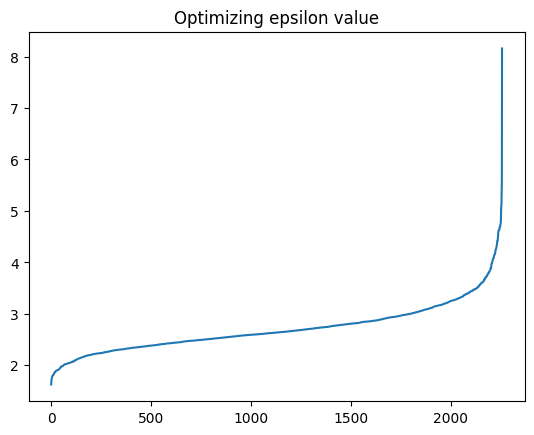

In [153]:
%%time
embedded_dict = cluster_utils.embed_corpus(word_list)
cluster_dict, dist_dict, labels = cluster_utils.run_clustering(embedded_dict)

In [154]:
#for key, val in dist_dict_2.items():
#    print('dist 1:', dist_dict[key], '\tdist 2:', dist_dict_2[key])

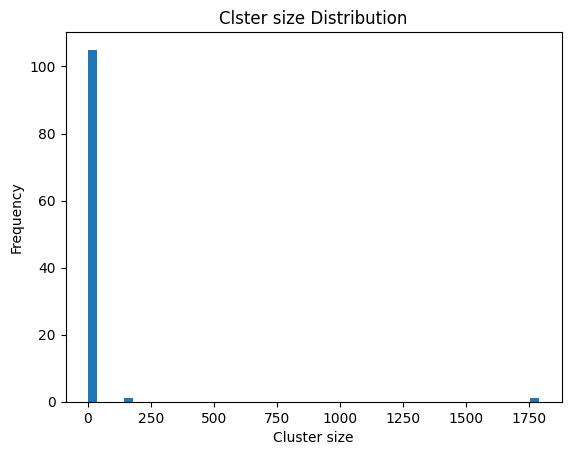

In [155]:
cluster_utils.plot_cluster_size_distribution(cluster_dict)

Plotting tSNE

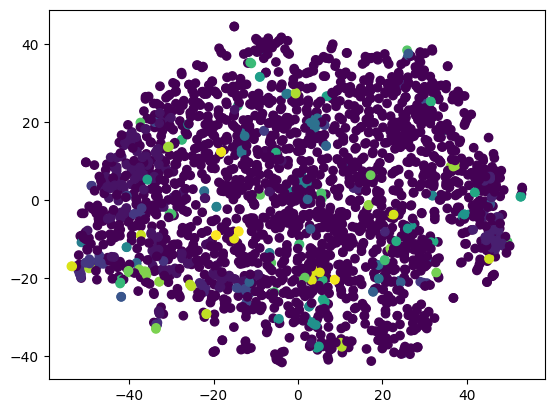

CPU times: total: 1min 9s
Wall time: 19.5 s


In [156]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels)

#### 3.1.2) Using DBSCAN with cosine distance

Testing DBSCAN with cosine metric

eps 0.056689203


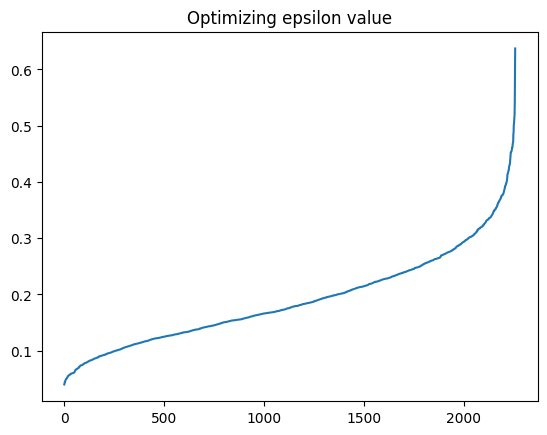

In [157]:
cluster_dict_cos, dist_dict_cos, labels_cos = cluster_utils.run_clustering(embedded_dict, cosine=True)

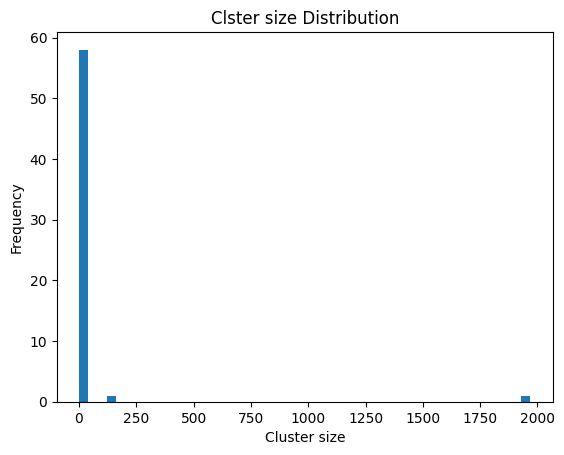

In [158]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_cos)

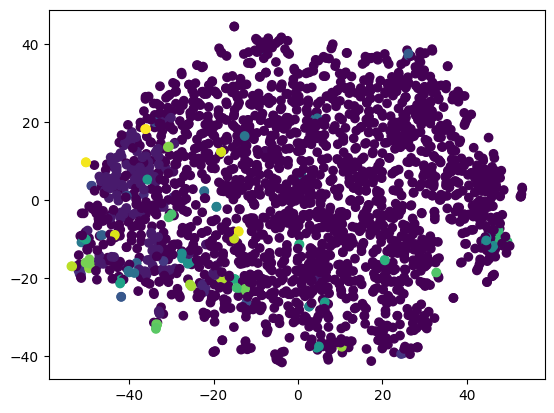

CPU times: total: 1min 11s
Wall time: 18.5 s


In [159]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels_cos)

#### 3.1.3) Using HDBSCAN with UMAP

In [160]:
cluster_dict_h, dist_dict_h, labels_h = cluster_utils.run_clustering_hdbscan(embedded_dict)

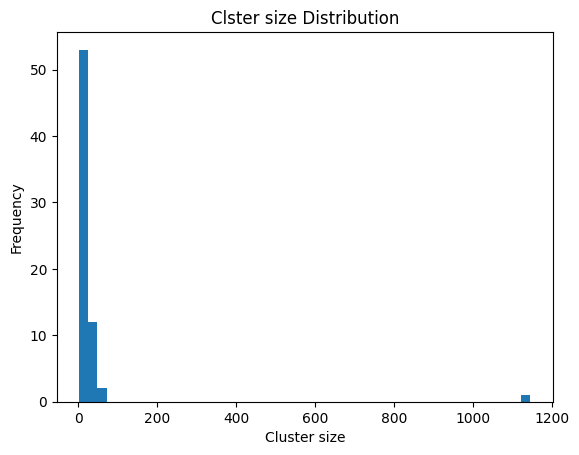

In [161]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_h)

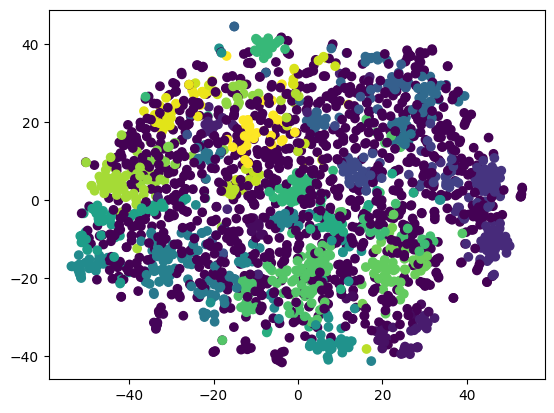

In [162]:
cluster_utils.plot_tsne(embedded_dict, labels_h)

#### 3.1.4) Comapirson

In [163]:
print('Euclidian distance:\t', len(cluster_dict), 'clusters')
print('Cosine distance:\t', len(cluster_dict_cos), 'clusters')
print('HDBSCAN clustering:\t', len(cluster_dict_h), 'clusters')

Euclidian distance:	 107 clusters
Cosine distance:	 60 clusters
HDBSCAN clustering:	 68 clusters


Plotting Jaccard index histogram

In [164]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['chocolate', 'banana', 'love', 'hi', 'cola']

Getting distance threshold

In [165]:
threshold = cluster_utils.define_max_threshold()
threshold

sim_list_best 0.82521856
sim_list_worst 0.56748897


0.3036462366580963

### 3.2) replacing words in documents

#### 3.2.1) Based on Eucledian distance

In [166]:
######################### TEMP #######################
#df = df[:30]

Starting average Jaccard index: 0.22369185766816038
Distance threshold: 0.3036462366580963
distance: 0.117537186 	replacing ['interest', 'potential'] in significant
distance: 0.13134822 	replacing ['struggle', 'waste'] in problems
distance: 0.16331552 	replacing ['forward', 'ahead', 'return'] in starting
distance: 0.14364523 	replacing ['nashville', 'brooklyn'] in l.a.
distance: 0.3408029 the next cluster is too wide and wont be replaced: ['five', 'many', 'make', 'remember', 'mess', 'high', 'else', 'might', 'step', 'less', 'talk', 'second', 'yes', 'soon', 'call', 'anyone', 'today', 'fly', 'certainly', 'another', 'absolutely', 'go', 'bring', 'reason', 'way', 'finally', 'always', 'really', 'like', 'four', 'anybody', 'maybe', 'actually', 'give', 'away', 'although', 'whether', 'need', 'possibly', 'let', 'already', 'break', 'stupid', 'wonder', 'lot', 'perhaps', 'catch', 'especially', 'sure', 'doubt', 'twice', 'blow', 'fill', 'everything', 'wrong', 'think', 'obviously', 'whole', 'apparently'

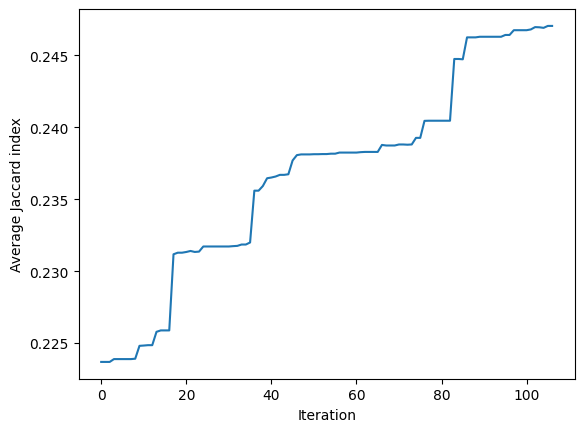

In [167]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

In [168]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) great!!!: (i) like (it.) (it) (was)...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - scott ...,steer clear: steer clear (of) (this) [borderla...
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...
1004,41149,sick and twisted is good...: this book is sick...,1,25,like and twisted is fun ... : this book is lik...,[like] (and) {twist} (is) [fun] (this) book (i...
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...


#### 3.2.2) Based on Cosine distance

Starting average Jaccard index: 0.22369185766816038
Distance threshold: 0.3036462366580963
distance: 0.117537186 	replacing ['interest', 'potential'] in significant
distance: 0.13134822 	replacing ['struggle', 'waste'] in problems
distance: 0.11843895 	replacing ['forward', 'ahead'] in starting
distance: 0.33559543 the next cluster is too wide and wont be replaced: ['five', 'many', 'make', 'remember', 'people', 'else', 'might', 'step', 'talk', 'second', 'yes', 'soon', 'call', 'anyone', 'today', 'certainly', 'another', 'absolutely', 'go', 'bring', 'reason', 'way', 'bad', 'finally', 'always', 'really', 'like', 'girl', 'four', 'anybody', 'maybe', 'actually', 'give', 'although', 'whether', 'need', 'possibly', 'let', 'different', 'nice', 'already', 'boy', 'stupid', 'guy', 'wonder', 'long', 'crazy', 'lot', 'perhaps', 'especially', 'sure', 'doubt', 'explain', 'damn', 'everything', 'wrong', 'think', 'obviously', 'whole', 'apparently', 'next', 'tell', 'still', 'however', 'old', 'totally', 'good

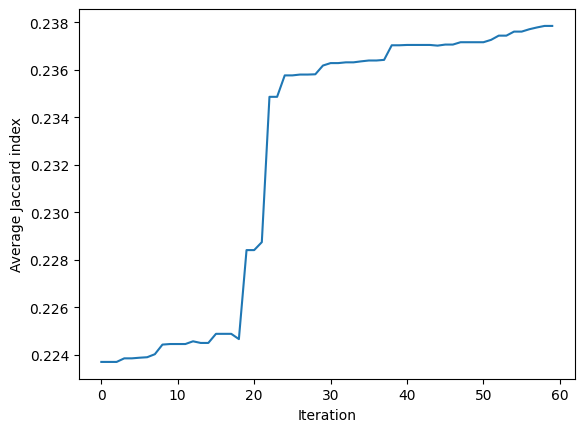

In [169]:
%%time
df_3, word_dict_3 = nlp_utils.replace_words_in_df(df, cluster_dict_cos, dist_dict_cos, threshold, word_dict)

In [170]:
df_3

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was exciting ! ! ! : i like it . it was ver...,(it) (was) [exciting] (i) like (it.) (it) (was...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this product was just wh...,{docker} (do) (the) job.: (this) [tools] (was)...
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - ray ti...,steer clear: steer clear (of) (this) [borderla...
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...
1004,41149,sick and twisted is good...: this book is sick...,1,25,sick and twisted is good ... : this book is si...,[like] (and) {twist} (is) [fun] (this) book (i...
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...


#### 3.2.3) Based on HDBSCAN clustering

Starting average Jaccard index: 0.22369185766816038
Distance threshold: 0.3036462366580963
distance: 0.27759197 	replacing ['scary', 'stupid', 'annoying', 'damn', 'creepy', 'hilarious', 'dumb', 'kinda', 'silly', 'funny', 'sick', 'weird'] in crazy
distance: 0.34699535 the next cluster is too wide and wont be replaced: ['forward', 'st', 'second', 'class', 'minute', 'course', 'college', 'point', 'date', 'practice', 'schedule', 'surprise', 'present', 'place', 'chance']
distance: 0.38760644 the next cluster is too wide and wont be replaced: ['nashville', 'shia', 'city', 'india', 'portuguese', 'west', 'boston', 'french', 'border', 'state', 'former', 'seal', 'africa', 'east', 'sandy', 'japan', 'catholic', 'british', 'birmingham', 'western', 'thailand', 'marine', 'native', 'german', 'australian', 'region', 'jewish', 'temple', 'brooklyn', 'american', 'christians', 'country', 'south', 'african', 'soldier', 'uk', 'elementary']
distance: 0.35157076 the next cluster is too wide and wont be replaced

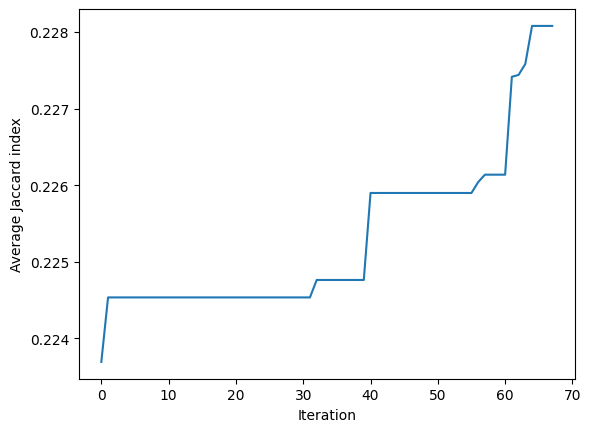

In [171]:
%%time
df_4, word_dict_4 = nlp_utils.replace_words_in_df(df, cluster_dict_h, dist_dict_h, threshold, word_dict)

In [172]:
df_4

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship seems and was in excellen...,textbook: book {ship} [seems] (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) [exciting] (i) like (it.) (it) (was...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - ray ti...,steer clear: steer clear (of) (this) [borderla...
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...
1004,41149,sick and twisted is good...: this book is sick...,1,25,crazy and twisted is good ... : this book is c...,[crazy] (and) {twist} (is) [fun] (this) book (...
1005,41156,difficult for a lay person: i found this book ...,0,24,seems for a lay person : i find this book was ...,[seems] (for) (a) lay person: (i) {find} (this...


Looking at the histogram again

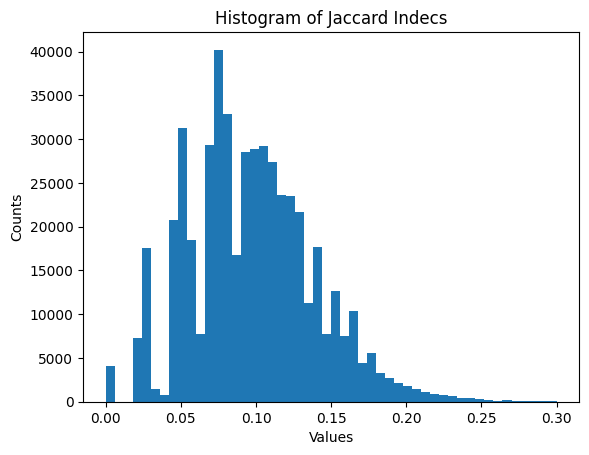

CPU times: total: 8.05 s
Wall time: 8.68 s


In [173]:
%%time
nlp_utils.plot_jaccard_hist(df_2, column='txt')

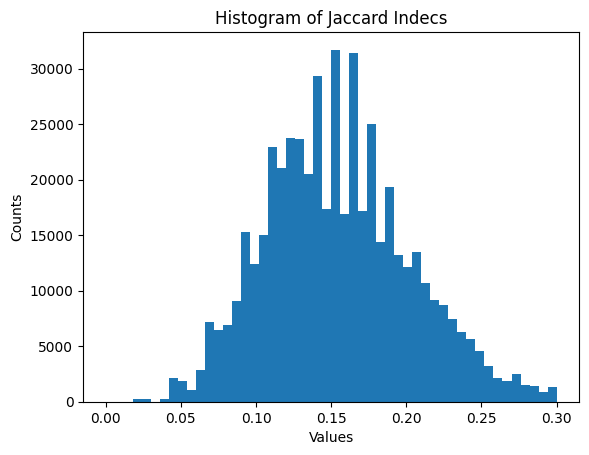

CPU times: total: 8.19 s
Wall time: 9.23 s


In [174]:
%%time
nlp_utils.plot_jaccard_hist(df_2, 'anon_txt')

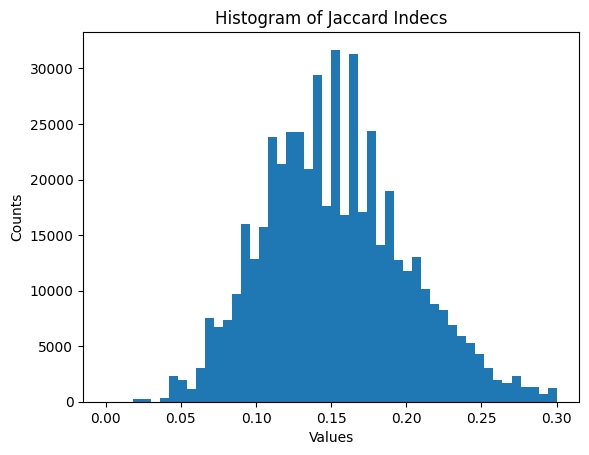

CPU times: total: 8.56 s
Wall time: 8.85 s


In [175]:
%%time
nlp_utils.plot_jaccard_hist(df_3, 'anon_txt')

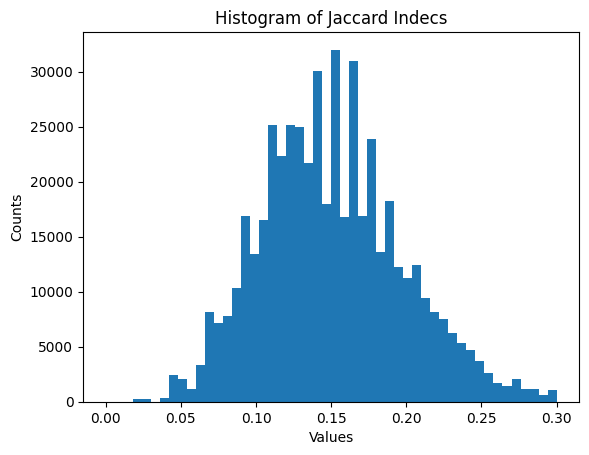

CPU times: total: 8.39 s
Wall time: 8.62 s


In [176]:
%%time
nlp_utils.plot_jaccard_hist(df_4, 'anon_txt')

In [187]:
print('Eucolidian dist:\t', df_2.iloc[3, 4])
print('Cosine dist:\t\t', df_3.iloc[3, 4])
print('HDNSCAN:\t\t', df_4.iloc[3, 4])

Eucolidian dist:	 it was great ! ! ! : i like it . it was very cool to answer about vampire and other legendary crature of the fun .
Cosine dist:		 it was exciting ! ! ! : i like it . it was very cool to answer about vampire and other legendary crature of the night .
HDNSCAN:		 it was great ! ! ! : i like it . it was very cool to read about vampire and other legendary crature of the night .


In [188]:
print('Eucolidian dist:\t', df_2.iloc[3, 5])
print('Cosine dist:\t\t', df_3.iloc[3, 5])
print('HDNSCAN:\t\t', df_4.iloc[3, 5])

Eucolidian dist:	 (it) (was) great!!!: (i) like (it.) (it) (was) (very) cool (to) [answer] (about) {vampire} (and) (other) legendary {crature} (of) (the) [fun] 
Cosine dist:		 (it) (was) [exciting] (i) like (it.) (it) (was) (very) cool (to) [answer] (about) {vampire} (and) (other) legendary {crature} (of) (the) [fun] 
HDNSCAN:		 (it) (was) [exciting] (i) like (it.) (it) (was) (very) cool (to) [answer] (about) {vampire} (and) (other) legendary {crature} (of) (the) [fun] 


## 4) Force anonymity

### Get anonymity degree

Before replacement

In [182]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 1005 	number of all documents: 1007


After replacement

In [183]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['anon_txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['anon_txt']))

Current k: 1 	number of un-anonym. documents: 1005 	number of all documents: 1007


### 4.1) Method 1 - Forcing Anonymity by Finding the nearest k neighbors
Steps:
1. Finding k nearest neighbors
2. Finding the different words between the neighbors
2. Replacing the different words with *

#### Toy examples

In [192]:
k=2
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala', 'lalalala'], k=k)

[[0, 3], [1, 2], [4, 5]]

In [193]:
k=3
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala', 'lalalala'], k=k)

[[0, 3, 2], [1, 5, 4]]

The algorithm is greedy

In [194]:
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala'], k=3)

[[0, 3, 2], [1, 4]]

#### Running on data

#### k=2

In [200]:
df_2_2 = anonym_utils.force_anonym(df_2, k=2)

get_anonym_degree: 1
non_anon_indexes: [394, 489, 54, 465, 371, 188, 92, 830, 272, 182, 168, 775, 987, 306, 976, 763, 497, 487, 995, 293, 330, 353, 77, 230, 815, 994, 143, 708, 405, 1003, 66, 576, 144, 397, 285, 425, 517, 774, 973, 670, 646, 771, 712, 640, 834, 94, 974, 837, 605, 786, 412, 62, 13, 362, 400, 254, 506, 36, 999, 162, 603, 198, 724, 234, 480, 95, 594, 529, 233, 528, 39, 270, 495, 65, 354, 530, 810, 290, 52, 350, 128, 624, 368, 277, 806, 807, 416, 599, 220, 70, 452, 7, 996, 523, 123, 641, 301, 869, 788, 252, 471, 504, 822, 269, 904, 777, 611, 694, 848, 164, 710, 57, 635, 259, 401, 979, 944, 302, 756, 304, 1000, 630, 592, 235, 237, 809, 256, 572, 122, 739, 790, 176, 45, 335, 4, 843, 804, 291, 866, 747, 258, 361, 785, 808, 331, 792, 557, 684, 750, 507, 265, 582, 243, 241, 244, 303, 990, 516, 813, 639, 81, 75, 97, 732, 852, 488, 203, 602, 268, 392, 322, 67, 408, 466, 768, 273, 69, 417, 14, 227, 56, 216, 675, 988, 422, 74, 424, 247, 43, 674, 154, 791, 735, 744, 456, 284, 838, 6

Running again

In [201]:
df_2_2 = anonym_utils.force_anonym(df_2_2, col='force_anon_txt', k=2)

get_anonym_degree: 1
non_anon_indexes: [274, 364, 191, 223, 154, 89, 132, 225, 307, 375, 546, 548, 405, 227, 379, 428, 7, 288, 329, 228, 96, 97, 466, 389, 341, 144, 401, 163, 345, 289, 1, 434, 92, 237, 47, 370, 78, 230, 371, 164, 413, 494, 146, 457, 81, 504, 441, 245, 524, 320, 103, 175, 183, 36, 242, 451, 465, 219, 315, 113, 416, 537, 277, 270, 117, 472, 357, 393, 201, 193, 392, 17, 255, 258, 503, 40, 141, 75, 148, 234, 180, 26, 552, 28, 486, 167, 402, 396, 123, 98, 182, 179, 325, 122, 427, 420, 496, 278, 985, 68, 48, 302, 174, 59, 50, 91, 450, 169, 444, 354, 487, 527, 528, 229, 71, 253, 165, 224, 562, 362, 139, 269, 464, 37, 516, 29, 114, 418, 259, 373, 509, 88, 300, 52, 214, 411, 365, 108, 442, 41, 459, 170, 501, 351, 66, 574, 49, 284, 205, 142, 517, 86, 119, 3, 347, 70, 382, 79, 972, 23, 115, 206, 130, 254, 55, 186, 380, 8, 62, 419, 603, 784, 412, 153, 558, 477, 105, 438, 506, 324, 298, 592, 233, 34, 166, 368, 273, 530, 808, 350, 128, 292, 331, 317, 805, 360, 476, 639, 252, 295, 30

In [202]:
df_2_2['force_anon_txt']

0       * from the * : i have a * of this * and * it a...
1       * ! : these track are not the " * " * but are ...
2       ** : * * * and was in * condition as * . * * w...
3       it was * ! ! ! : i * it . it was ** * to * abo...
4       * : this is * the * * i have ever answer . it ...
                              ...                        
1002    like and twisted is fun ... : this book is lik...
1003    difficult for a lay person : i find this book ...
1004    very funny book : i originally stumble across ...
1005    difficult for a lay person : i find this book ...
1006    very funny book : i originally stumble across ...
Name: force_anon_txt, Length: 1007, dtype: object

The anonymity degree is still 1 :(

In [203]:
anonym_utils.get_anonym_degree(docs = df_2_2['force_anon_txt'])

(1,
 [[127],
  [191],
  [142],
  [505],
  [99],
  [157],
  [53],
  [301],
  [103],
  [144],
  [445],
  [235],
  [546],
  [145],
  [237],
  [268],
  [5],
  [471],
  [466],
  [246],
  [119],
  [104],
  [183],
  [47],
  [56],
  [152],
  [27],
  [231],
  [230],
  [232],
  [167],
  [260],
  [494],
  [283],
  [457],
  [504],
  [275],
  [524],
  [63],
  [314],
  [523],
  [141],
  [262],
  [531],
  [65],
  [177],
  [223],
  [248],
  [131],
  [125],
  [247],
  [7],
  [17],
  [478],
  [503],
  [89],
  [94],
  [116],
  [14],
  [78],
  [98],
  [118],
  [115],
  [484],
  [206],
  [325],
  [16],
  [308],
  [496],
  [178],
  [39],
  [190],
  [112],
  [174],
  [59],
  [522],
  [450],
  [169],
  [277],
  [444],
  [220],
  [487],
  [527],
  [528],
  [147],
  [105],
  [510],
  [143],
  [110],
  [22],
  [25],
  [263],
  [495],
  [259],
  [109],
  [31],
  [136],
  [229],
  [66],
  [41],
  [219],
  [38],
  [90],
  [74],
  [321],
  [517],
  [50],
  [216],
  [240],
  [436],
  [972],
  [9],
  [23],
  [133],
  

### 4.2) Force anonymity by iterations
Steps:
1. Order the words in the vocabulary by their rareness.
2. Replace the most rare word with * 
3. Test anonymity degree. If the degree is less than the requested - go back to 2.

#### Toy example

In [206]:
anonym_utils.force_anonym_by_iteration(['I love choco', 'I love banana', 'love banana'], k=2)

Replace choco
docs: ['I love *', 'I love banana', 'love banana']
curr_k 1
Replace banana
docs: ['I love *', 'I love *', 'love *']
curr_k 3


['I love *', 'I love *', 'love *']

#### Running on data

In [207]:
anon_txt = anonym_utils.force_anonym_by_iteration(df_2['anon_txt'], k=2)

Replace lenghty
curr_k 1
Replace nothin
curr_k 1
Replace norton
curr_k 1
Replace normally
curr_k 1
Replace normal
curr_k 1
Replace nook
curr_k 1
Replace nonetheless
curr_k 1
Replace noire
curr_k 1
Replace nirvana
curr_k 1
Replace ninnia
curr_k 1
Replace nott
curr_k 1
Replace nightmare
curr_k 1
Replace nevermind
curr_k 1
Replace netflix
curr_k 1
Replace necessary
curr_k 1
Replace nearly
curr_k 1
Replace near
curr_k 1
Replace nd
curr_k 1
Replace nature
curr_k 1
Replace narration
curr_k 1
Replace narnia
curr_k 1
Replace nicely
curr_k 1
Replace nap
curr_k 1
Replace novice
curr_k 1
Replace npr
curr_k 1
Replace opera
curr_k 1
Replace opend
curr_k 1
Replace oneto
curr_k 1
Replace olympic
curr_k 1
Replace olga
curr_k 1
Replace ole
curr_k 1
Replace oldie
curr_k 1
Replace oh
curr_k 1
Replace official
curr_k 1
Replace nozzle
curr_k 1
Replace offer
curr_k 1
Replace ocean
curr_k 1
Replace occasional
curr_k 1
Replace occasion
curr_k 1
Replace obviously
curr_k 1
Replace obvious
curr_k 1
Replace obser

In [209]:
print(anon_txt[0])
print(anon_txt[950])

* from the * : i have a * of this * and * it and ca n't * * the * * * out in a few *
* it : * is one of the most * * i have ever * . i have two * just because i ca n't get enough of this * .


## 5) Utilization tests

In [ ]:
df_21 = utilization_utils.get_vader_sentiment_for_df(df_2, ['txt', 'anon_txt'])
df_21

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,txt_vader_sentiment_pred,anon_txt_vader_sentiment_pred
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...,0.6369,0.6369
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...",0.0000,-0.1957
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...,0.7650,0.8720
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) great!!!: (i) like (it.) (it) (was)...,0.7157,0.9242
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...,0.1761,0.2006
...,...,...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - ray ti...,steer clear: steer clear (of) (this) [borderla...,0.1045,0.1045
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...,0.8625,0.8658
1004,41149,sick and twisted is good...: this book is sick...,1,25,sick and twisted is fun ... : this book is sic...,sick (and) {twist} (is) [fun] (this) book (is)...,-0.4404,0.1027
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...,0.5647,0.4084


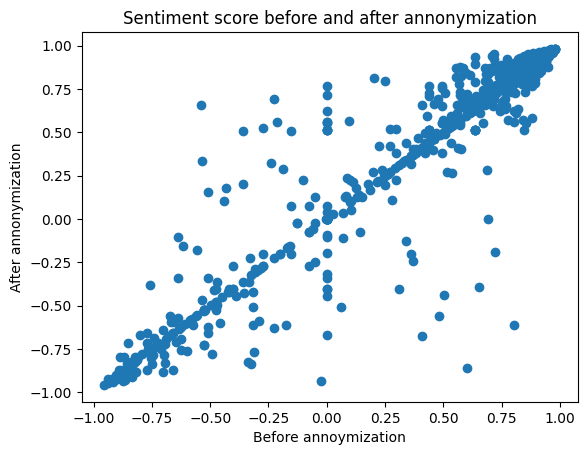

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


In [ ]:
utilization_utils.sentiment_test(df_2, 'txt')

0.7771153846153847

In [ ]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

0.806923076923077